## Imports

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Dataset

In [345]:
df = pd.read_csv("../data/_202107291244210_unemployment-rate-by-state-1982-to-2020-malaysia.csv")
df.head()

,Year,State/Country,Unemployment Rate (Percentage)
0,2020,Malaysia,4.5
1,2020,Johor,3.5
2,2020,Kedah,4.2
3,2020,Kelantan,4.3
4,2020,Melaka,2.2


In [346]:
df = df.drop((df[df["State/Country"] == "Malaysia"]).index)
df.head()

,Year,State/Country,Unemployment Rate (Percentage)
1,2020,Johor,3.5
2,2020,Kedah,4.2
3,2020,Kelantan,4.3
4,2020,Melaka,2.2
5,2020,Negeri Sembilan,3.8


In [347]:
df = df.drop((df[df["Year"] < 2018]).index)
df.head()

,Year,State/Country,Unemployment Rate (Percentage)
1,2020,Johor,3.5
2,2020,Kedah,4.2
3,2020,Kelantan,4.3
4,2020,Melaka,2.2
5,2020,Negeri Sembilan,3.8


In [348]:
df.columns

Index(['Year', 'State/Country', ' Unemployment Rate (Percentage) '], dtype='object')

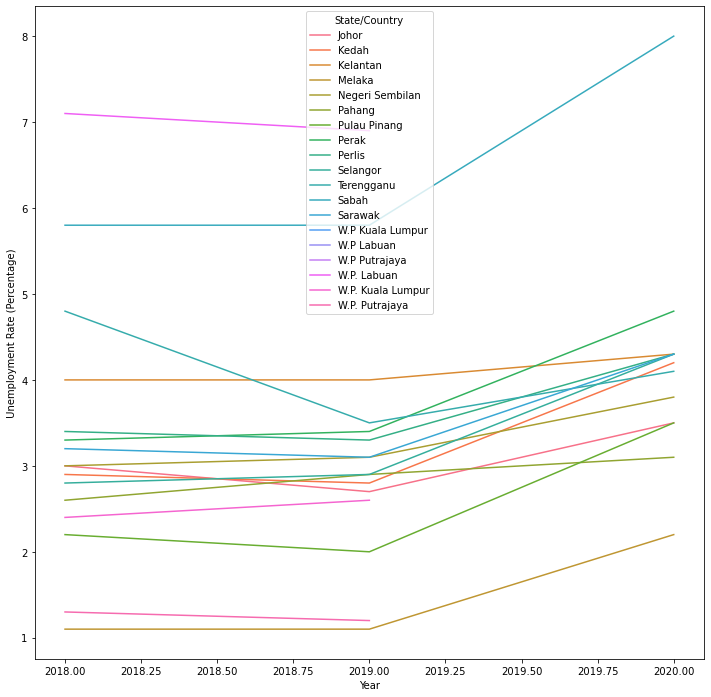

In [349]:
plt.figure(figsize=(12, 12))
sns.lineplot(data=df, x="Year", y=" Unemployment Rate (Percentage) ", hue="State/Country")
plt.show()

In [350]:
df_2019 = df[df["Year"] == 2019]
df_2019 = df_2019.set_index("State/Country")
df_2019 = df_2019.drop("Year", axis=1)
df_2019 = df_2019.rename(columns={
    " Unemployment Rate (Percentage) ": "Rate 2019"
})
df_2019.head()

,Rate 2019
State/Country,
Johor,2.7
Kedah,2.8
Kelantan,4.0
Melaka,1.1
Negeri Sembilan,3.1


In [351]:
df_2019.index

Index(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
       'Perak', 'Perlis', 'Pulau Pinang', 'Sabah', 'Sarawak', 'Selangor',
       'Terengganu', 'W.P. Labuan', 'W.P. Kuala Lumpur', 'W.P. Putrajaya'],
      dtype='object', name='State/Country')

In [352]:
def map_state_name(state_name):
    if state_name == "W.P Labuan":
        return "W.P. Labuan"
    elif state_name == "W.P Kuala Lumpur":
        return "W.P. Kuala Lumpur"
    elif state_name == "W.P Putrajaya":
        return "W.P. Putrajaya"
    else:
        return state_name

In [353]:
df_2020 = df[df["Year"] == 2020].copy()
df_2020["State/Country"] = df_2020["State/Country"].map(map_state_name)
df_2020 = df_2020.set_index("State/Country")
df_2020 = df_2020.drop("Year", axis=1)
df_2020 = df_2020.rename(columns={
    " Unemployment Rate (Percentage) ": "Rate 2020"
})
df_2020.head()

,Rate 2020
State/Country,
Johor,3.5
Kedah,4.2
Kelantan,4.3
Melaka,2.2
Negeri Sembilan,3.8


In [354]:
df_2020.index

Index(['Johor', 'Kedah', 'Kelantan', 'Melaka', 'Negeri Sembilan', 'Pahang',
       'Pulau Pinang', 'Perak', 'Perlis', 'Selangor', 'Terengganu', 'Sabah',
       'Sarawak', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya'],
      dtype='object', name='State/Country')

In [355]:
df_merged = pd.merge(df_2019, df_2020, right_index=True, left_index=True)
df_merged

,Rate 2019,Rate 2020
State/Country,,
Johor,2.7,3.5
Kedah,2.8,4.2
Kelantan,4.0,4.3
Melaka,1.1,2.2
Negeri Sembilan,3.1,3.8
Pahang,2.9,3.1
Perak,3.4,4.8
Perlis,3.3,4.3
Pulau Pinang,2.0,3.5


In [356]:
df_merged["Rate Change"] = df_merged["Rate 2020"] - df_merged["Rate 2019"]
df_merged = df_merged.reset_index()
df_merged = df_merged.rename(columns={"State/Country": "State"})
df_merged

,State,Rate 2019,Rate 2020,Rate Change
0,Johor,2.7,3.5,0.8
1,Kedah,2.8,4.2,1.4
2,Kelantan,4.0,4.3,0.3
3,Melaka,1.1,2.2,1.1
4,Negeri Sembilan,3.1,3.8,0.7
5,Pahang,2.9,3.1,0.2
6,Perak,3.4,4.8,1.4
7,Perlis,3.3,4.3,1.0
8,Pulau Pinang,2.0,3.5,1.5
9,Sabah,5.8,8.0,2.2


In [357]:
df_merged.describe()

,Rate 2019,Rate 2020,Rate Change
count,16.00000,16.000000,16.000000
mean,3.20625,4.193750,0.987500
std,1.46172,1.581758,0.564358
min,1.10000,1.500000,0.200000
25%,2.67500,3.500000,0.525000
50%,3.00000,4.150000,1.050000
75%,3.42500,4.300000,1.400000
max,6.90000,8.000000,2.200000


## Choropleth Map

In [358]:
shape_file = gpd.read_file("../assets/mys_admbnda_adm1_unhcr_20210211.shp")
shape_file

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,10.541451,1.556311,Johor,MY01,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.42134 1.30583, 103.42113 1..."
1,8.615689,0.777377,Kedeh,MY02,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.32889 5.66444, 100.32917 5..."
2,7.185704,1.234524,Kelantan,MY03,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.17395 6.20126, 102.17395 6..."
3,2.067451,0.134483,Melaka,MY06,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.33500 2.04833, 102.33528 2..."
4,3.620969,0.542415,Negeri,MY07,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((101.79472 2.51389, 101.79444 2..."
5,10.750731,2.919169,Pahang,MY08,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.45879 3.46532, 103.45823 3..."
6,11.358448,1.707114,Perak,MY09,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.10291 3.97632, 100.10300 3..."
7,1.361590,0.067320,Perlis,MY10,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"POLYGON ((100.12444 6.40509, 100.12567 6.40631..."
8,2.616795,0.086223,Pulau Pinang,MY11,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.17973 5.23083, 100.18000 5..."
9,38.328468,6.028039,Sabah,MY12,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((118.62939 4.11226, 118.62906 4..."


In [359]:
shape_file['coords'] = shape_file['geometry'].apply(lambda x: x.representative_point().coords[:])
shape_file['coords'] = [coords[0] for coords in shape_file['coords']]
shape_file

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,coords
0,10.541451,1.556311,Johor,MY01,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.42134 1.30583, 103.42113 1...","(103.30113801482267, 2.0468704700000444)"
1,8.615689,0.777377,Kedeh,MY02,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.32889 5.66444, 100.32917 5...","(100.67994398841068, 5.811975956000055)"
2,7.185704,1.234524,Kelantan,MY03,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.17395 6.20126, 102.17395 6...","(102.07655906545948, 5.3980298040000605)"
3,2.067451,0.134483,Melaka,MY06,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.33500 2.04833, 102.33528 2...","(102.2935095071807, 2.2969439030000274)"
4,3.620969,0.542415,Negeri,MY07,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((101.79472 2.51389, 101.79444 2...","(102.21883446639197, 2.7747005225000407)"
5,10.750731,2.919169,Pahang,MY08,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.45879 3.46532, 103.45823 3...","(102.5953249514501, 3.617359996000033)"
6,11.358448,1.707114,Perak,MY09,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.10291 3.97632, 100.10300 3...","(101.01923746907319, 4.799846172500054)"
7,1.361590,0.067320,Perlis,MY10,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"POLYGON ((100.12444 6.40509, 100.12567 6.40631...","(100.26422984074586, 6.490690946500052)"
8,2.616795,0.086223,Pulau Pinang,MY11,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.17973 5.23083, 100.18000 5...","(100.45620001854851, 5.357679606000062)"
9,38.328468,6.028039,Sabah,MY12,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((118.62939 4.11226, 118.62906 4...","(117.22161121180139, 5.581777573000039)"


In [360]:
def map_adm1_en(state_name):
    if state_name == "Kedeh":
        return "Kedah"
    elif state_name == "Negeri":
        return "Negeri Sembilan"
    else:
        return state_name

In [361]:
shape_file["ADM1_EN"] = shape_file["ADM1_EN"].map(map_adm1_en)
shape_file["ADM1_EN"]

0                 Johor
1                 Kedah
2              Kelantan
3                Melaka
4       Negeri Sembilan
5                Pahang
6                 Perak
7                Perlis
8          Pulau Pinang
9                 Sabah
10              Sarawak
11             Selangor
12           Terengganu
13    W.P. Kuala Lumpur
14          W.P. Labuan
15       W.P. Putrajaya
Name: ADM1_EN, dtype: object

In [362]:
df_plot = pd.merge(shape_file, df_merged, how="left", left_on="ADM1_EN", right_on="State")
df_plot

,Shape_Leng,Shape_Area,ADM1_EN,ADM1_PCODE,ADM1_REF,ADM1ALT1EN,ADM1ALT2EN,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry,coords,State,Rate 2019,Rate 2020,Rate Change
0,10.541451,1.556311,Johor,MY01,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.42134 1.30583, 103.42113 1...","(103.30113801482267, 2.0468704700000444)",Johor,2.7,3.5,0.8
1,8.615689,0.777377,Kedah,MY02,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.32889 5.66444, 100.32917 5...","(100.67994398841068, 5.811975956000055)",Kedah,2.8,4.2,1.4
2,7.185704,1.234524,Kelantan,MY03,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.17395 6.20126, 102.17395 6...","(102.07655906545948, 5.3980298040000605)",Kelantan,4.0,4.3,0.3
3,2.067451,0.134483,Melaka,MY06,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((102.33500 2.04833, 102.33528 2...","(102.2935095071807, 2.2969439030000274)",Melaka,1.1,2.2,1.1
4,3.620969,0.542415,Negeri Sembilan,MY07,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((101.79472 2.51389, 101.79444 2...","(102.21883446639197, 2.7747005225000407)",Negeri Sembilan,3.1,3.8,0.7
5,10.750731,2.919169,Pahang,MY08,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((103.45879 3.46532, 103.45823 3...","(102.5953249514501, 3.617359996000033)",Pahang,2.9,3.1,0.2
6,11.358448,1.707114,Perak,MY09,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.10291 3.97632, 100.10300 3...","(101.01923746907319, 4.799846172500054)",Perak,3.4,4.8,1.4
7,1.361590,0.067320,Perlis,MY10,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"POLYGON ((100.12444 6.40509, 100.12567 6.40631...","(100.26422984074586, 6.490690946500052)",Perlis,3.3,4.3,1.0
8,2.616795,0.086223,Pulau Pinang,MY11,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((100.17973 5.23083, 100.18000 5...","(100.45620001854851, 5.357679606000062)",Pulau Pinang,2.0,3.5,1.5
9,38.328468,6.028039,Sabah,MY12,None,None,None,Malaysia,MY,2020-12-02,2021-02-11,None,"MULTIPOLYGON (((118.62939 4.11226, 118.62906 4...","(117.22161121180139, 5.581777573000039)",Sabah,5.8,8.0,2.2


In [363]:
def set_annotation_color(rate_change):
    if rate_change > 1.5:
        return "white"
    else:
        return "black"

In [364]:
def set_annotation_text(state, rate_change):
    if state in ["W.P. Kuala Lumpur", "W.P. Putrajaya", "W.P. Labuan"]:
        return ""
    else:
        return state + "\n" + str(round(rate_change, 1))

In [365]:
def set_additional_text():
    kl = df_plot[df_plot["State"] == "W.P. Kuala Lumpur"]["Rate Change"].values[0]
    putrajaya = df_plot[df_plot["State"] == "W.P. Putrajaya"]["Rate Change"].values[0]
    labuan = df_plot[df_plot["State"] == "W.P. Labuan"]["Rate Change"].values[0]

    return "W.P. Kuala Lumpur: " + str(round(kl, 1)) \
           + "\n\n" + "W.P. Putrajaya: " + str(round(putrajaya, 1))\
           + "\n\n" + "W.P. Labuan: " + str(round(labuan, 1))

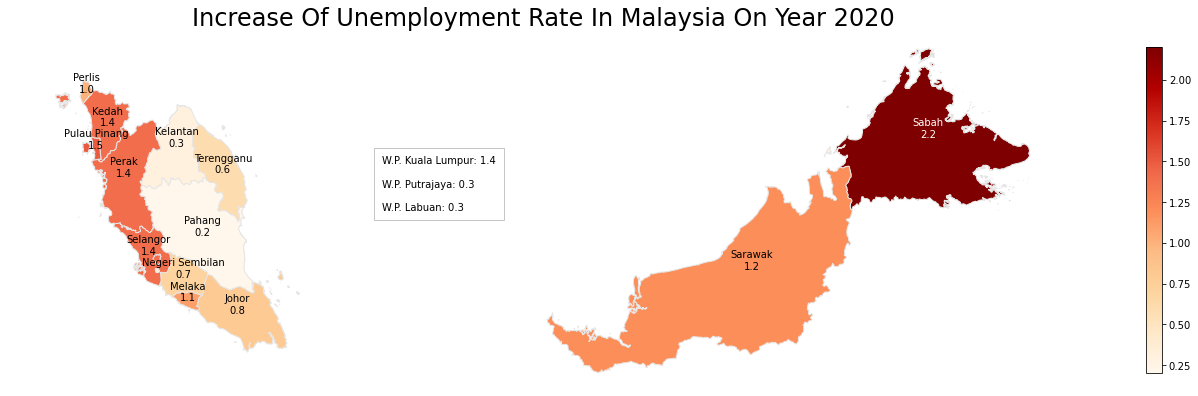

In [366]:
fig, ax = plt.subplots(1, figsize=(24, 24))

df_plot.plot(
    column="Rate Change",
    cmap="OrRd",
    linewidth=1, ax=ax,
    edgecolor='0.9',
    legend=True,
    legend_kwds={"shrink": 0.25}
)

for idx, row in df_plot.iterrows():
    plt.annotate(
        text=set_annotation_text(row["State"], row["Rate Change"]),
        xy=row["coords"],
        horizontalalignment="center",
        color=set_annotation_color(row["Rate Change"])
    )

plt.text(
    0.35,
    0.5,
    set_additional_text(),
    bbox=dict(facecolor='none', edgecolor='#c6c6c6', pad=8.0),
    transform=ax.transAxes
)

ax.axis('off')

plt.title("Increase Of Unemployment Rate In Malaysia On Year 2020", fontsize=24)

plt.savefig("../visualizations/unemployment-choropleth.png")
plt.show()